# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

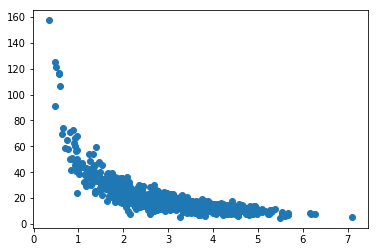

In [1]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
p4 = np.poly1d(np.polyfit(pageSpeeds, purchaseAmount, 4))

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

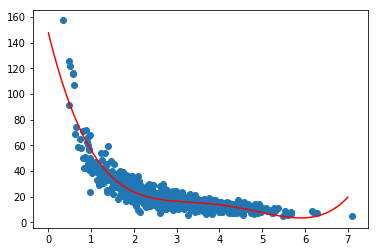

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(purchaseAmount, p4(pageSpeeds))

print(r2)

0.82937663963


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

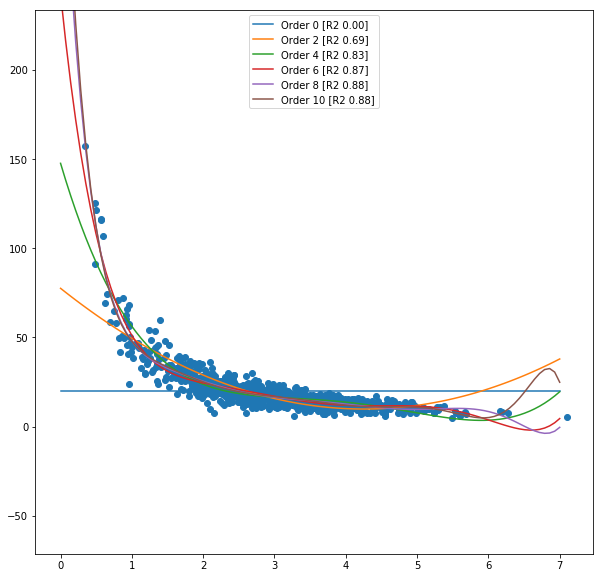

In [6]:
minOrder=0
maxOrder=11
stepOrder=2
extraY=0.5
figure(figsize=(10,10))
plt.scatter(pageSpeeds, purchaseAmount)
for order in range(minOrder,maxOrder,stepOrder):
    p=np.poly1d(np.polyfit(pageSpeeds, purchaseAmount, order))
    r2=r2_score(purchaseAmount, p(pageSpeeds))
    plt.plot(xp, p(xp), label="Order {} [R2 {:.2f}]".format(order,r2))
extra=int(extraY*(max(purchaseAmount)-min(purchaseAmount)))
plt.ylim((min(purchaseAmount)-extra,max(purchaseAmount)+extra))
legend(loc='upper center')
plt.show()